In [1]:
from openbb_terminal.sdk import openbb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\chadc\anaconda3\envs\quant-stack\lib\site-packages\openbb_terminal\stocks\options\tmx_model.py:52: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  options_listings = pd.read_html(r.text)


Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

In [2]:
# Function to identify support and resistance levels
def find_support_resistance(data, window=10):
    local_min = data['Close'].rolling(window=window, min_periods=1).min()
    local_max = data['Close'].rolling(window=window, min_periods=1).max()

    support = data['Close'] == local_min
    resistance = data['Close'] == local_max

    return support, resistance

In [9]:
# Fetch historical data for SPY
spy_data = openbb.stocks.load(
    "SPY", 
    start_date="2024-01-01", 
    end_date = "2024-10-31", 
    monthly=False,
)

Loading Daily data for SPY with starting period 2024-01-02.

In [11]:
# Identify support and resistance
support, resistance = find_support_resistance(spy_data)
print(support)
print(resistance)

date
2024-01-02     True
2024-01-03     True
2024-01-04     True
2024-01-05    False
2024-01-08    False
              ...  
2024-10-25    False
2024-10-28    False
2024-10-29    False
2024-10-30    False
2024-10-31     True
Name: Close, Length: 211, dtype: bool
date
2024-01-02     True
2024-01-03    False
2024-01-04    False
2024-01-05    False
2024-01-08     True
              ...  
2024-10-25    False
2024-10-28    False
2024-10-29    False
2024-10-30    False
2024-10-31    False
Name: Close, Length: 211, dtype: bool


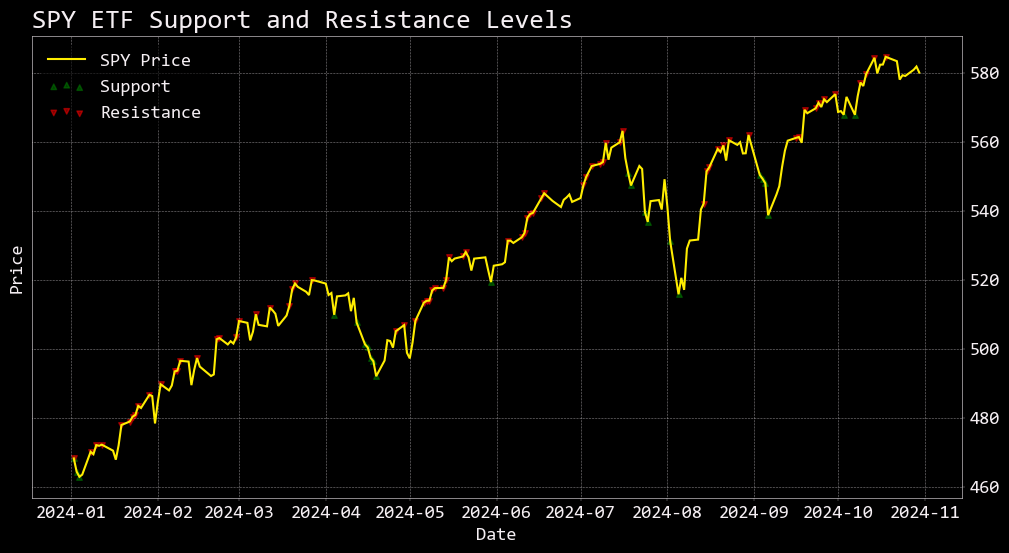

In [8]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(spy_data['Close'], label='SPY Price')
plt.scatter(spy_data.index[support], spy_data['Close'][support], color='green', label='Support', marker='^', alpha=0.5)
plt.scatter(spy_data.index[resistance], spy_data['Close'][resistance], color='red', label='Resistance', marker='v', alpha=0.5)
plt.title('SPY ETF Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()